# Rule-based Model


## Apriori

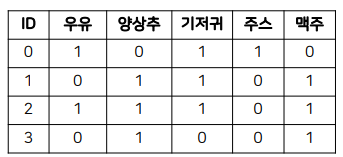

고객의 장바구니를 분석하여 나와 비슷한 영화를 본 유저의 정보를 바탕으로 영화를 추천

input = user가 지금 까지 본 영화

output = user가 본 영화 데이터를 기반으로 비슷한 영화를 묶어 추천

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import warnings

warnings.filterwarnings(action='ignore')
%matplotlib inline

In [ ]:
movie_paths = '/content/drive/MyDrive/추천/data/movies/'

movie = pd.read_csv(movie_paths + "ratings.csv")
meta = pd.read_csv(movie_paths + 'movies_metadata.csv', low_memory=False)

In [ ]:
movie.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [ ]:
meta.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.7129,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.859495,/16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.387519,/e64sOI48hQXyru7naBFyssKFxVd.jpg,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [ ]:
meta = meta.rename(columns={'id':'movieId'})
movie['movieId'] = movie['movieId'].astype(str)
meta['movieId'] = meta['movieId'].astype(str)

movie = pd.merge(movie, meta[['movieId', 'original_title']], how='left', on='movieId')
movie = movie[movie['original_title'].notnull()].reset_index(drop=True)
movie.head()

,userId,movieId,rating,timestamp,original_title
0,1,1371,2.5,1260759135,Rocky III
1,1,1405,1.0,1260759203,Greed
2,1,2105,4.0,1260759139,American Pie
3,1,2193,2.0,1260759198,My Tutor
4,1,2294,2.0,1260759108,Jay and Silent Bob Strike Back


In [ ]:
agg = movie.groupby(['userId'])['original_title'].agg({'unique'})
agg.head()

,unique
userId,
1,"[Rocky III, Greed, American Pie, My Tutor, Jay..."
2,"[The Dark, 2001: A Space Odyssey, Trois couleu..."
3,"[Trois couleurs : Rouge, The Killing, Carne tr..."
4,"[Italiensk for begyndere, Donnie Darko, Lost i..."
5,"[Varjoja paratiisissa, Lola rennt, Donnie Dark..."


In [ ]:
from mlxtend.preprocessing import TransactionEncoder

te = TransactionEncoder()
te_ary = te.fit(agg['unique'].values).transform(agg['unique'].values)

In [ ]:
df = pd.DataFrame(te_ary, columns=te.columns_)
df.head()

,!Women Art Revolution,'Gator Bait,'Twas the Night Before Christmas,...Più forte ragazzi!,00 Schneider - Jagd auf Nihil Baxter,10 Items or Less,10 Things I Hate About You,"10,000 BC",11'09''01 - September 11,12 + 1,12 Angry Men,13 Tzameti,1408,15 Minutes,16 Blocks,1724 기방난동사건,1942: A Love Story,1984,2 Days in Paris,"20,000 Leagues Under the Sea",2001: A Space Odyssey,2010,2046,2061 - Un anno eccezionale,21 Grams,24 Hour Party People,25th Hour,28 Days Later,28 Weeks Later,29th Street,2:37,3 Ninjas: High Noon at Mega Mountain,3 hommes et un couffin,300,33 sceny z życia,36 Fillette,"4 luni, 3 săptămîni și 2 zile",40 Days and 40 Nights,42nd Street,48 Hrs.,...,真夜中の弥次さん喜多さん,続宮本武蔵 一乗寺の決闘,綠草地,纵横四海,羅生門,英雄,菊次郎の夏,薔薇の葬列,蜘蛛巣城,裸の島,誰も知らない,豚と軍艦,赤ひげ,野火,鎗王之王,隠し砦の三悪人,風の谷のナウシカ,香港製造,鬼婆,鷹爪鐵布衫,거룩한 계보,고지전,공동경비구역 JSA,괴물,김복남 살인사건의 전말,다세포 소녀,도쿄!,밀양,봄 여름 가을 겨울 그리고 봄,빈집,사마리아,야수,연가시,오직 그대만,올드보이,"장화, 홍련",최종병기 활,친절한 금자씨,해안선,활
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
from mlxtend.frequent_patterns import apriori, association_rules

frequent_itemsets = apriori(df, min_support=0.3, use_colnames=True)
association_rules(frequent_itemsets , metric="confidence", min_threshold=0.3)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Terminator 3: Rise of the Machines),(The Million Dollar Hotel),0.482861,0.463487,0.326379,0.675926,1.458348,0.102578,1.655525
1,(The Million Dollar Hotel),(Terminator 3: Rise of the Machines),0.463487,0.482861,0.326379,0.704180,1.458348,0.102578,1.748153
2,(Terminator 3: Rise of the Machines),(Солярис),0.482861,0.453055,0.333830,0.691358,1.525991,0.115067,1.772101
3,(Солярис),(Terminator 3: Rise of the Machines),0.453055,0.482861,0.333830,0.736842,1.525991,0.115067,1.965127
4,(Солярис),(The Million Dollar Hotel),0.453055,0.463487,0.308495,0.680921,1.469125,0.098509,1.681442
5,(The Million Dollar Hotel),(Солярис),0.463487,0.453055,0.308495,0.665595,1.469125,0.098509,1.635575


# 데이터 출처
- https://www.kaggle.com/chocozzz/t-academy-recommendation2


# 참고자료

- https://developers.google.com/machine-learning/recommendation?hl=ko

- https://tacademy.skplanet.com/live/player/onlineLectureDetail.action?seq=194

- https://www.youtube.com/watch?v=1fhNX_JFaow

- https://brunch.co.kr/@kakao-it/72#comment

- https://www.youtube.com/watch?v=h6vePourB7E&list=LL&index=1&t=15s

- https://ratsgo.github.io/generative%20model/2018/01/27/VAE/

- https://github.com/GunhoChoi/PyTorch-FastCampus/blob/master/08_Autoencoder/3_Variational_Autoencoder.ipynb

- https://ko-kr.facebook.com/groups/TensorFlowKR/permalink/524873987853664/

- https://doheelab.github.io/recommender-system/ncf_mlp/